## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import skew, kurtosis, norm
from sklearn.metrics import r2_score
from scipy.stats import t

## Read & Display the data

In [2]:
data = pd.read_csv("top_expensive_leagues.csv")
data.head()

,League ID,League Name,Country,Sport,Revenue (USD),Average Player Salary (USD),Top Team,Total Teams,Founded Year,Viewership
0,L001,Premier League,England,Football,5275330000,12080000,Liverpool,16,1886,485.90
1,L002,Serie A,India,American Football,7088640000,6730000,Inter Milan,13,1977,135.01
2,L003,IPL,England,American Football,7930520000,14360000,Chennai Super Kings,13,1979,157.49
3,L004,La Liga,Spain,American Football,4972890000,13720000,Atletico Madrid,22,1999,245.71
4,L005,Serie A,Italy,Basketball,6265740000,7450000,Juventus,16,1963,52.83


## Descriptive Statistics - Mean, Standard Deviation, Skewness, Kurtosis

In [4]:
def descriptive_analysis(data):
    """
    Perform descriptive statistical analysis on the dataset.
    
    Prints:
        - Summary statistics of the dataset.
        - Skewness of numeric columns.
        - Kurtosis of numeric columns.
    """
    print("Dataset Description:")
    print(data.describe())
    print("\nSkewness of numeric columns:")
    print(data.skew(numeric_only=True))
    print("\nKurtosis of numeric columns:")
    print(data.kurt(numeric_only=True))
descriptive_analysis(data)

Dataset Description:
       Revenue (USD)  Average Player Salary (USD)  Total Teams  Founded Year  \
count   7.000000e+02                 7.000000e+02   700.000000    700.000000   
mean    4.280496e+09                 7.900443e+06    21.184286   1953.061429   
std     2.162867e+09                 4.100048e+06     6.676591     40.956733   
min     5.054000e+08                 1.010000e+06    10.000000   1880.000000   
25%     2.522775e+09                 4.180000e+06    15.000000   1917.750000   
50%     4.306905e+09                 7.835000e+06    21.000000   1953.500000   
75%     6.112678e+09                 1.148500e+07    27.000000   1989.250000   
max     7.997000e+09                 1.496000e+07    32.000000   2023.000000   

       Viewership  
count  700.000000  
mean   255.944400  
std    140.300158  
min      2.280000  
25%    135.077500  
50%    250.860000  
75%    376.512500  
max    499.950000  

Skewness of numeric columns:
Revenue (USD)                  0.034521
Average 

## Relational Graph - Scatter Plot

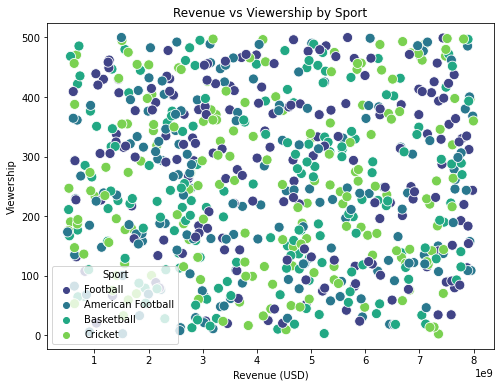

In [5]:
def plot_scatter(data):
    """
    Plot a scatter plot of revenue vs viewership categorized by sport.
    
    Args:
        data : The dataset containing columns 'Revenue (USD)', 'Viewership', and 'Sport'.
        
    Displays:
         A scatter plot with points colored by 'Sport'.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=data["Revenue (USD)"], 
        y=data["Viewership"], 
        hue=data["Sport"], 
        palette="viridis", 
        s=100
    )
    plt.title("Revenue vs Viewership by Sport")
    plt.xlabel("Revenue (USD)")
    plt.ylabel("Viewership")
    plt.show()
plot_scatter(data)

## Categorical Graph - Bar Chart

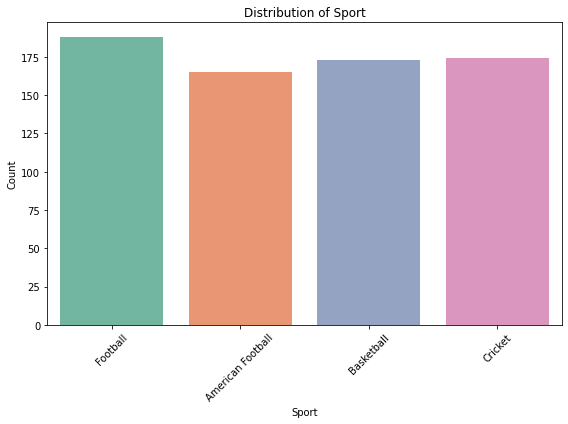

In [8]:
def plot_categorical_graph(data, column):
    """
    Plot a bar chart for the distribution of a categorical variable.
    
    Args:
        data : The dataset containing the categorical variable.
        
    Displays:
        A bar chart showing the count of each category in the specified column.
    """
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=data, palette='Set2')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_categorical_graph(data, "Sport")

## Statistical Graph - HeatMap

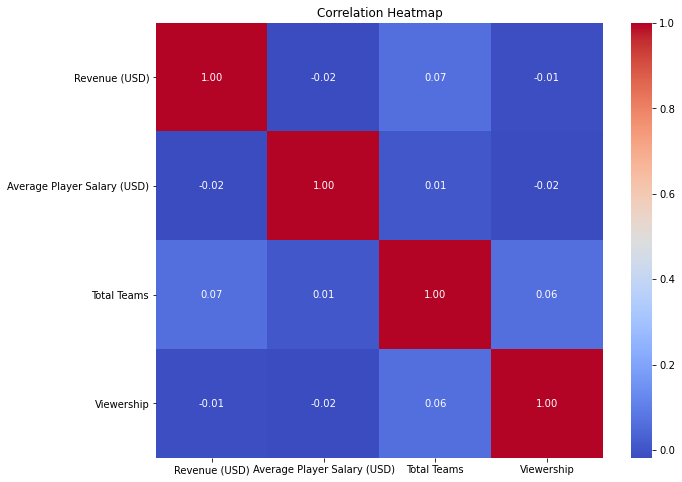

In [9]:
def plot_heatmap(data):
    """
    Plot a heatmap of correlations among numeric columns.
    
    Args:
        data (pd.DataFrame): The dataset containing numeric columns such as 'Revenue (USD)', 
                             'Average Player Salary (USD)', 'Total Teams', and 'Viewership'.
                             
    Displays:
        - A heatmap of correlation coefficients between selected numeric columns.
    """
    plt.figure(figsize=(10, 8))
    corr = data[["Revenue (USD)", "Average Player Salary (USD)", "Total Teams", "Viewership"]].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()
plot_heatmap(data)

## Clustering - KMeans with Silhouette/Elbow method

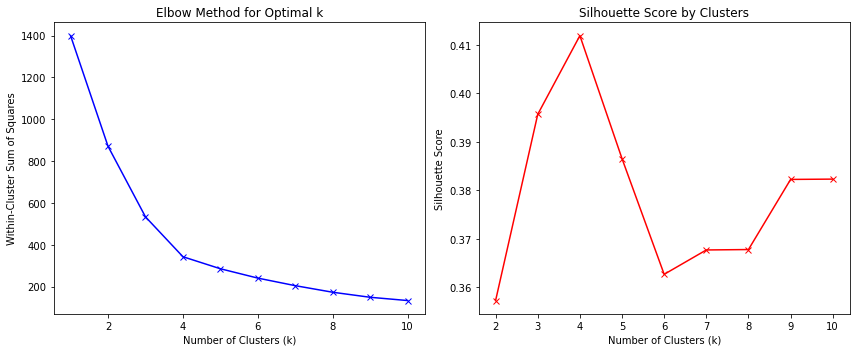

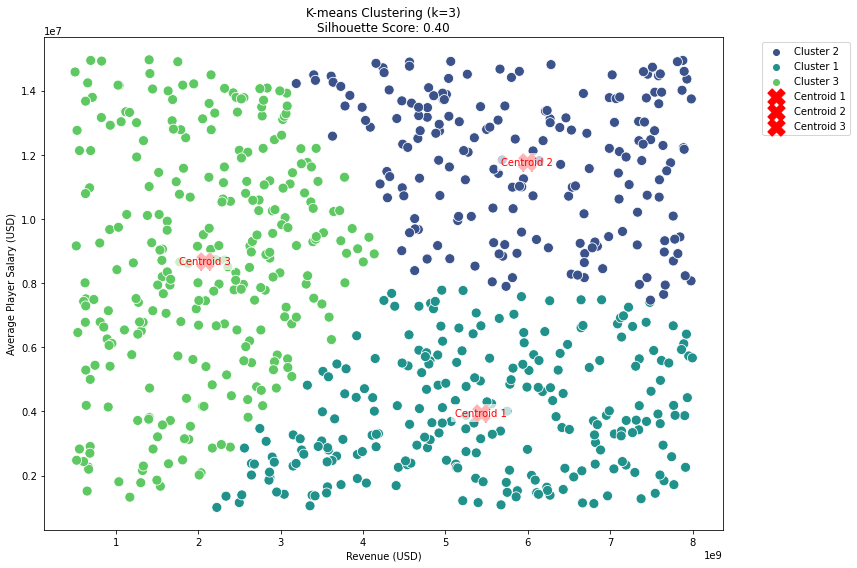

KMeans(n_clusters=3, random_state=42)

In [12]:
def kmeans_clustering(data, features, k=3, predict_points=None, plot_elbow=True):
    """
    Performs K-means clustering on the given dataset with advanced visualization and analysis.
    
    Args:
        data (pd.DataFrame): Dataset with features for clustering.
        features (list): List of column names to use for clustering.
        k (int): Number of clusters for K-means. Default is 3.
        predict_points (list of lists): New points to predict and visualize. Default is None.
        plot_elbow (bool): Whether to plot the elbow method for cluster selection. Default is True.
    
    Returns:
        tuple: (Clustered data, K-means model, Optional Elbow Plot)
    """
    # Validate input
    if len(features) < 2:
        raise ValueError("At least two features are required for visualization")
    
    # Standardize the features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[features])
    
    # Elbow Method for optimal cluster selection
    if plot_elbow:
        # Compute Within-Cluster-Sum-of-Squares (WCSS) for different k values
        wcss = []
        silhouette_scores = []
        k_range = range(1, 11)  # Test from 1 to 10 clusters
        
        for n_clusters in k_range:
            kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
            kmeans.fit(scaled_data)
            wcss.append(kmeans.inertia_)
            
            # Compute silhouette score (skip for 1 cluster as it's not meaningful)
            if n_clusters > 1:
                silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))
        
        # Plot Elbow Curve
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(k_range, wcss, 'bx-')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Within-Cluster Sum of Squares')
        plt.title('Elbow Method for Optimal k')
        
        # Plot Silhouette Scores
        plt.subplot(1, 2, 2)
        plt.plot(k_range[1:], silhouette_scores, 'rx-')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Silhouette Score')
        plt.title('Silhouette Score by Clusters')
        plt.tight_layout()
        plt.show()
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    data["Cluster"] = kmeans.fit_predict(scaled_data)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(scaled_data, data["Cluster"])
    
    # Prepare for visualization
    cluster_centers = kmeans.cluster_centers_ * scaler.scale_ + scaler.mean_
    cluster_labels = {i: f"Cluster {i+1}" for i in range(kmeans.n_clusters)}
    
    # Plot Clusters
    plt.figure(figsize=(12, 8))
    palette = sns.color_palette("viridis", n_colors=k)
    
    # Main scatter plot
    scatter = sns.scatterplot(
        x=data[features[0]],
        y=data[features[1]],
        hue=data["Cluster"].map(cluster_labels),
        palette=palette,
        s=100
    )
    
    # Annotate cluster centers
    for i, (x, y) in enumerate(cluster_centers):
        plt.scatter(x, y, color="red", marker="X", s=300, label=f"Centroid {i+1}")
        plt.text(x, y, f"Centroid {i+1}", fontsize=10, color="red", 
                 ha="center", va="center", bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
    
    # Handle predicted points
    if predict_points is not None:
        scaled_points = scaler.transform(predict_points)
        predicted_clusters = kmeans.predict(scaled_points)
        
        for point, cluster in zip(predict_points, predicted_clusters):
            plt.scatter(
                point[0], point[1],
                color=palette[cluster],
                edgecolor="black",
                s=200,
                marker="D",
                label=f"Predicted Point (Cluster {cluster + 1})"
            )
    
    plt.title(f"K-means Clustering (k={k})\nSilhouette Score: {silhouette_avg:.2f}")
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    return kmeans

kmeans_clustering(
        data, 
        ["Revenue (USD)", "Average Player Salary (USD)"], 
        k=3, 
        plot_elbow=True
    )

## Line Fitting Technique

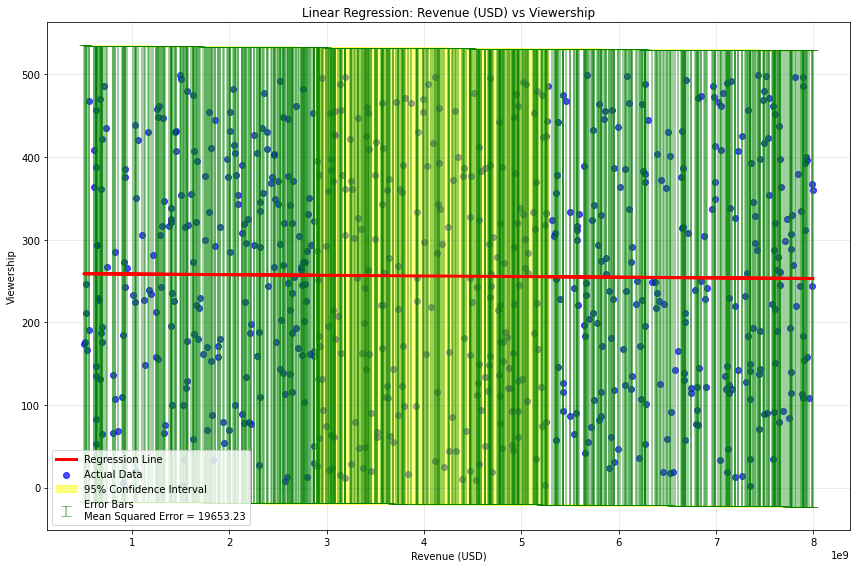

LinearRegression()

In [13]:
def linear_fitting(data, features=['Revenue (USD)'], target='Viewership'):
    """
    Perform linear regression analysis with confidence intervals and error bars.
    
    Args:
        features (list): List of feature column names for regression
        target (str): Name of the target column
    
    Returns:
        tuple: (regression model, predictions, standard error)
    """
    # Prepare data
    X = data[features].values
    y = data[target].values
    
    # Fit linear regression model
    reg = LinearRegression()
    reg.fit(X, y)
    predictions = reg.predict(X)
    
    # Calculate prediction uncertainties
    residuals = y - predictions
    std_err = np.std(residuals)
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    
    # Compute confidence intervals
    n = len(y)
    # Standard error of the estimate
    se_estimate = np.sqrt(np.sum(residuals**2) / (n - 2))
    
    # Compute standard error of the predictions
    x_mean = np.mean(X, axis=0)
    x_centered = X - x_mean
    cov_matrix = np.linalg.inv(np.dot(x_centered.T, x_centered))
    
    # Confidence interval at 95%
    t_value = t.ppf(0.975, df=n-2)
    
    # Visualization
    plt.figure(figsize=(12, 8))
    
    # Scatter plot of original data
    plt.scatter(data[features[0]], y, label="Actual Data", color="blue", alpha=0.7)
    
    # Regression line
    plt.plot(data[features[0]], predictions, color="red", linewidth=3, label="Regression Line")
    
    # Compute confidence bands
    ci_width = t_value * se_estimate * np.sqrt(1 + np.diagonal(np.dot(x_centered, np.dot(cov_matrix, x_centered.T))))
    

    
    # Confidence interval (prediction bands)
    plt.fill_between(
        data[features[0]].ravel(), 
        predictions - ci_width, 
        predictions + ci_width, 
        color="yellow", 
        alpha=0.5, 
        label="95% Confidence Interval"
    )
    
    # Error bars using standard error
    plt.errorbar(
        data[features[0]], 
        predictions, 
        yerr=ci_width, 
        fmt='none',  # No line connecting error bars
        ecolor='green', 
        alpha=0.5, 
        capsize=5,
        label=f"Error Bars\nMean Squared Error = {mse:.2f}"
    )
    
    # Formatting plot
    plt.title(f"Linear Regression: {features[0]} vs {target}")
    plt.xlabel(features[0])
    plt.ylabel(target)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return reg

linear_fitting(data)